In [1]:
#importar bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
#importar base de dados e adicionar a coluna 'Age' ao DataFrame existente e explorar colunas necessárias

df = pd.read_csv('ml_project1_data.csv', sep=',', encoding='cp1252', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13])

In [3]:
#importar base de dados e adicionar a coluna 'Age' ao DataFrame existente
now = pd.to_datetime('now')

age = (now.year - df['Year_Birth'])

new_df = pd.DataFrame(df)

new_df['Age'] = age

new_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,64
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,67
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,56
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,37
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,40


In [4]:
# adicionar a coluna 'Dt_Last_Purchase' ao DataFrame existente
import numpy as np

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

temp = df['Recency'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))

last_purchase = df['Dt_Customer'] + temp

new_df['Dt_Last_Purchase'] = last_purchase

new_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Age,Dt_Last_Purchase
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,64,2012-11-01
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,67,2014-04-15
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,56,2013-09-16
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,37,2014-03-08
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,40,2014-04-23


In [5]:
# Verificando a data de compra do último cliente
data_ref = new_df.Dt_Last_Purchase.max()
print(data_ref)

2014-10-04 00:00:00


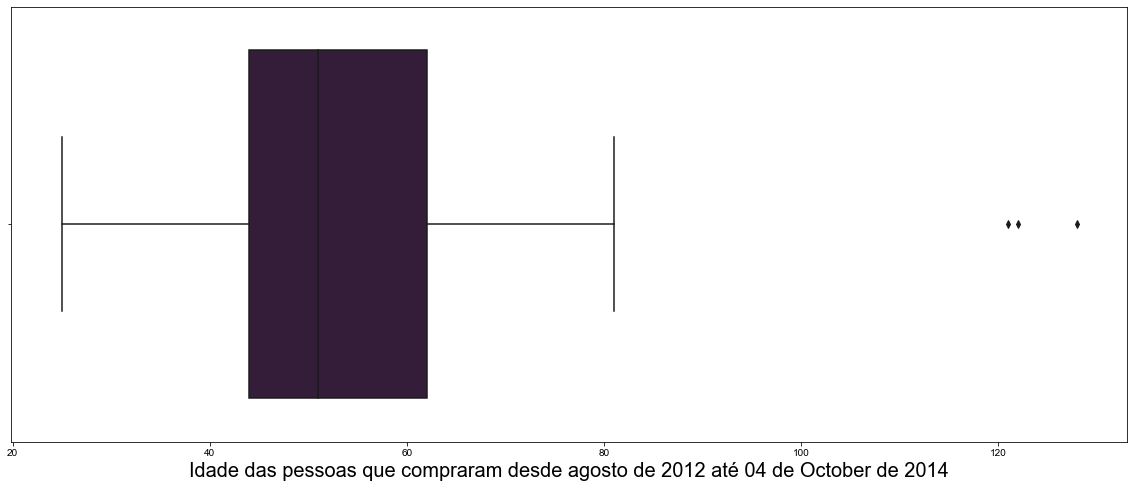

In [6]:
# Analise exploratória dos clientes baseada nas features | 'DtCustomer' & 'Recency' | 
# Desde a data de inscrição do cliente na empresa e numero de dias desde a última compra
import seaborn as sns
sns.set_palette("rocket")

ax = sns.boxplot(data = new_df, x = 'Age' )
ax.set_xlabel("Idade das pessoas que compraram desde agosto de 2012 até {}".format(data_ref.strftime('%d de %B de %Y')),
              fontsize = 20)
ax.figure.set_size_inches(20,8)
sns.set(font_scale = 1.8)

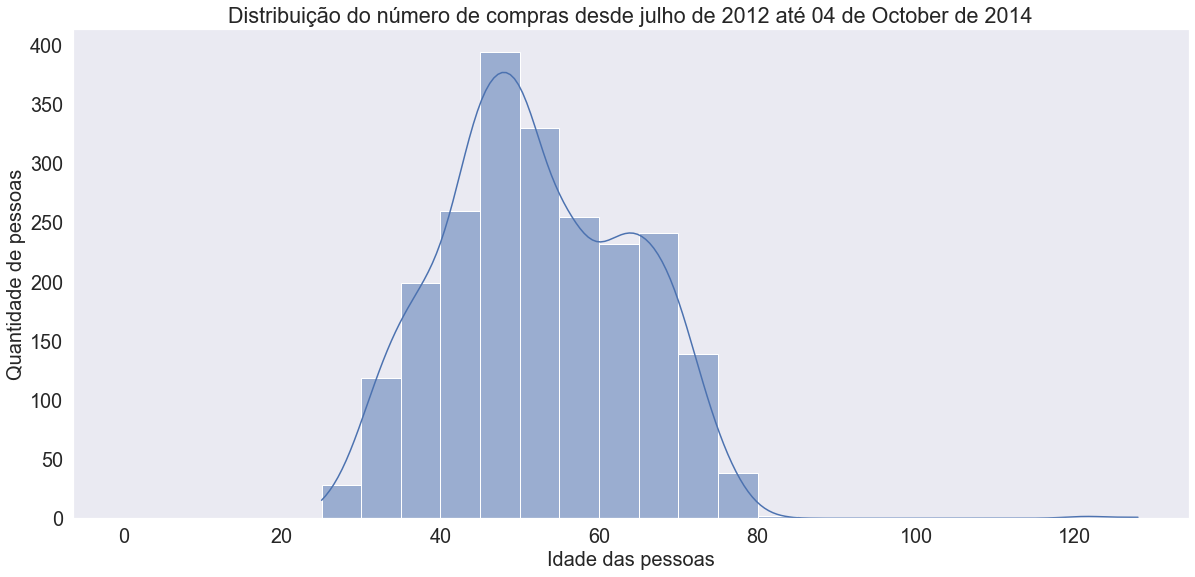

In [7]:
######
ax = sns.histplot(new_df.Age, kde = True,
                  bins = [i*5 for(i) in range (25)])
ax.set_xlabel("Idade das pessoas", 
              fontsize = 20, position=(0.5,0.5))
ax.set_ylabel("Quantidade de pessoas", 
              fontsize = 20, position=(0.5,0.5))
ax.grid(None)

ax.set_title('Distribuição do número de compras desde julho de 2012 até {}'.format(data_ref.strftime('%d de %B de %Y')))

ax.figure.set_size_inches(20,9)

In [8]:
#new_df = new_df.sort_values(by= 'Age')

dados_filtrados = pd.DataFrame(new_df)

categories = ['De 21 a 30 anos',
                              'De 31 a 40 anos','De 41 a 50 anos','De 51 a 60 anos',
                              'De 61 a 70 anos','De 71 a 80 anos','De 81 a 90 anos','Mais de 90 anos']
faixa_idade = [20 , 30 , 40 , 50 , 60 , 
               70 , 80 , 90, 130]
dados_filtrados['faixa'] = pd.cut(dados_filtrados.Age,
                                  bins= faixa_idade,labels = categories, 
                                  include_lowest= True)

In [9]:
### 
dados_filtrados.index = pd.to_datetime(dados_filtrados['Dt_Last_Purchase'])
dados_filtrados.faixa.unique();

In [10]:
####
dados_data = dados_filtrados.groupby(pd.Grouper(freq= 'M'))

In [11]:
###
dados_data.groups;

In [12]:
####
df1208 = dados_data.get_group('2012-08-31')
df1209 = dados_data.get_group('2012-09-30')
df1210 = dados_data.get_group('2012-10-31')
df1211 = dados_data.get_group('2012-11-30')
df1212 = dados_data.get_group('2012-12-31')
df1301 = dados_data.get_group('2013-01-31')
df1302 = dados_data.get_group('2013-02-28')
df1303 = dados_data.get_group('2013-03-31')
df1304 = dados_data.get_group('2013-04-30')
df1305 = dados_data.get_group('2013-05-31')
df1306 = dados_data.get_group('2013-06-30')
df1307 = dados_data.get_group('2013-07-31')
df1308 = dados_data.get_group('2013-08-31')
df1309 = dados_data.get_group('2013-09-30')
df1310 = dados_data.get_group('2013-10-31')
df1311 = dados_data.get_group('2013-11-30')
df1312 = dados_data.get_group('2013-12-31')
df1401 = dados_data.get_group('2014-01-31')
df1402 = dados_data.get_group('2014-02-28')
df1403 = dados_data.get_group('2014-03-31')
df1404 = dados_data.get_group('2014-04-30')
df1405 = dados_data.get_group('2014-05-31')
df1406 = dados_data.get_group('2014-06-30')
df1407 = dados_data.get_group('2014-07-31')
df1408 = dados_data.get_group('2014-08-31')
df1409 = dados_data.get_group('2014-09-30')
df1410 = dados_data.get_group('2014-10-31')

In [13]:
#####
todos_meses = [df1208 ,df1209 ,df1210 ,df1211 ,df1212 ,
               df1301 ,df1302 ,df1303 ,df1304 ,df1305 ,
               df1306 ,df1307 ,df1308 ,df1309 ,df1310 ,
               df1311 ,df1312 ,df1401 ,df1402 ,df1403 ,
               df1404 ,df1405 ,df1406 ,df1407 ,df1408 , 
               df1409 ,df1410]
 
for i in range(0,len(todos_meses)):
    #print(i)
    todos_meses[i] = todos_meses[i].groupby('faixa').Age.count()

In [14]:
for i in range(0,len(todos_meses)):
    #print(i)
    if i+8 <= 12 :
        todos_meses[i].rename('2012 - '+"%02d" % (i+8),inplace= True)
    else:
        todos_meses[i].rename('2013 - '+"%02d" % (i-4),inplace= True)

In [15]:
####
de1208_ate1410 = pd.DataFrame()

for i in range(0,len(todos_meses)):
    de1208_ate1410 = de1208_ate1410.append(todos_meses[i])

In [16]:
####
de1208_ate1410 = de1208_ate1410.T

In [17]:
###
de1208_ate1410

,2012 - 08,2012 - 09,2012 - 10,2012 - 11,2012 - 12,2013 - 01,2013 - 02,2013 - 03,2013 - 04,2013 - 05,...,2013 - 13,2013 - 14,2013 - 15,2013 - 16,2013 - 17,2013 - 18,2013 - 19,2013 - 20,2013 - 21,2013 - 22
De 21 a 30 anos,0.0,0.0,2.0,3.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,1.0,2.0,1.0,4.0,1.0,3.0,0.0,0.0,0.0
De 31 a 40 anos,3.0,6.0,10.0,23.0,10.0,16.0,10.0,25.0,12.0,18.0,...,8.0,11.0,17.0,19.0,16.0,12.0,14.0,4.0,1.0,0.0
De 41 a 50 anos,4.0,16.0,35.0,30.0,34.0,37.0,23.0,24.0,31.0,29.0,...,32.0,23.0,30.0,35.0,30.0,31.0,23.0,14.0,3.0,1.0
De 51 a 60 anos,2.0,15.0,16.0,23.0,26.0,23.0,20.0,30.0,26.0,21.0,...,20.0,26.0,20.0,18.0,26.0,17.0,21.0,12.0,9.0,0.0
De 61 a 70 anos,3.0,12.0,17.0,19.0,21.0,12.0,25.0,27.0,21.0,21.0,...,23.0,16.0,23.0,23.0,25.0,17.0,18.0,6.0,2.0,2.0
De 71 a 80 anos,1.0,5.0,4.0,5.0,2.0,4.0,6.0,7.0,3.0,4.0,...,5.0,8.0,4.0,2.0,7.0,8.0,7.0,2.0,0.0,0.0
De 81 a 90 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mais de 90 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
####
de1208_ate1410_porcentagem = pd.DataFrame()

for mes in de1208_ate1410:
    de1208_ate1410_porcentagem[str(mes)] = (de1208_ate1410[mes].values/de1208_ate1410[mes].values.sum())

de1208_ate1410_porcentagem.index = de1208_ate1410.index

Text(0.5, 0, 'Ano-mês')

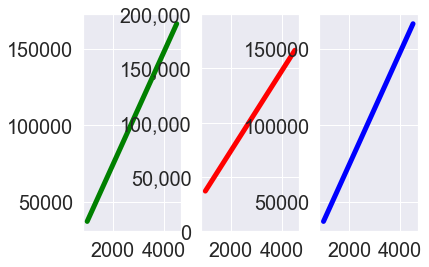

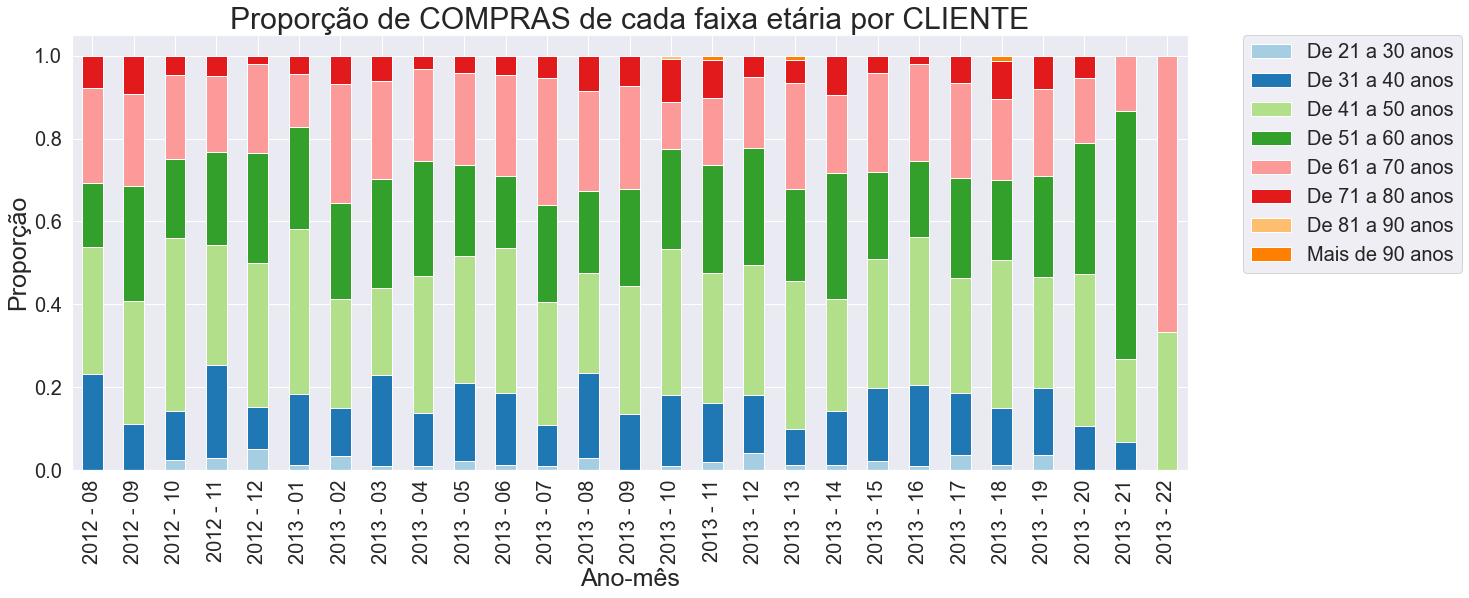

In [19]:
###
###import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker


mpl.rcParams['font.size'] = 6.5

x = np.array(range(1000, 5000, 500))
y = 37*x

fig, [ax1, ax2, ax3] = plt.subplots(1,3)

ax1.plot(x,y, linewidth=5, color='green')
ax2.plot(x,y, linewidth=5, color='red')
ax3.plot(x,y, linewidth=5, color='blue')

label_format = '{:,.0f}'

sns.set_palette("Paired")

ax = de1208_ate1410_porcentagem.T.plot(kind= 'bar' , stacked= True, figsize= (20,8),fontsize =20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 20)
# fixing yticks with "set_yticks"
ticks_loc = ax2.get_yticks().tolist()
ax2.set_yticks(ax1.get_yticks().tolist())
ax2.set_yticklabels([label_format.format(x) for x in ticks_loc])
#ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])
ax.set_ylabel("Proporção",fontsize=25)
ax.set_title("Proporção de COMPRAS de cada faixa etária por CLIENTE", fontsize = 30)
ax.set_xticklabels(de1208_ate1410.columns, rotation=90)
ax.set_xlabel("Ano-mês",fontsize=25)